# Handwritten Digit Classification using TensorFlow and Keras

Welcome to this notebook on Handwritten Digit Classification using TensorFlow and Keras. This notebook serves as a learning resource for people interested in the field of machine learning and computer vision.

## Introduction

In this notebook, we will explore the fascinating world of handwritten digit recognition, a classic problem in the field of machine learning and computer vision. We will use TensorFlow and Keras, two powerful libraries for machine learning in Python, to build and train our model.

We will be working with the MNIST dataset, a large database of handwritten digits that is commonly used for training various image processing systems. Our goal is to train a model that can accurately classify these handwritten digits.

This notebook is designed to be a hands-on learning resource. By the end of this notebook, you should have a good understanding of how to build and train a neural network for image classification tasks. Let's get started!

## Importing Necessary Libraries

In this section, we import all the necessary libraries that we will use throughout this notebook.

In [ ]:
##### import tensorflow and keras 
import tensorflow as tf
import keras
from keras import layers
import numpy as np # for dealing with arrays
import random
import matplotlib.pyplot as plt # data visualization
%matplotlib inline


- **TensorFlow** and **Keras**: Used for building and training machine learning models.
- **NumPy**: Used for numerical operations.
- **Matplotlib**: Used for creating visualizations.
- **%matplotlib inline**: Ensures plots are displayed in the notebook.

In [ ]:
# load the mnist data set from keras datasets 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

This above line of code is loading the MNIST dataset from Keras datasets.This dataset is widely used for "handwritten digit" classification tasks in machine learning.

- **x_train, y_train**: These are the training dataset and the corresponding labels. The model uses this data to learn.
- **x_test, y_test**: This is the test dataset with the corresponding labels. This data is used to evaluate the performance of the model after training.

The `load_data()` function automatically splits the MNIST data into training and test sets. 


In [ ]:
# understanding the train dataset
print('shape of x_train : ', x_train.shape)
print('x_train is a numpy array contains ',x_train.shape[0],' grayscale images (number of channel equals to 1 ) \neach image one is ',x_train.shape[1],'x',x_train.shape[2],' \nthe Pixel values range from 0 to 255')
print('shape of y_train : ',y_train.shape)
print('y_train is a numpy array of digit labels (integer from 1 to 9 ) of length ',y_train.shape[0],'corresponding to the images train examples')

shape of x_train :  (60000, 28, 28)
x_train is a numpy array contains  60000  grayscale images (number of channel equals to 1 ) 
each image one is  28 x 28  
the Pixel values range from 0 to 255
shape of y_train :  (60000,)
y_train is a numpy array of digit labels (integer from 1 to 9 ) of length  60000 corresponding to the images train examples


In the above code block, we are exploring the structure of our training dataset.

- `x_train.shape`: This gives us the shape of the training data array. It tells us the number of images and the dimensions of each image (height and width in pixels).
- `x_train`: This is a numpy array containing grayscale images. Each image is represented as a 2D array of pixel values ranging from 0 (black) to 255 (white).
- `y_train.shape`: This gives us the shape of the labels array for the training data. It tells us the number of labels, which should match the number of images in `x_train`.
- `y_train`: This is a numpy array containing the labels for each image in `x_train`. Each label is an integer from 1 to 9, corresponding to the digit represented in the image.

In [ ]:
# display a train  example of the data 
np.set_printoptions(linewidth=30)
print('label class of the first train example : ',y_train[0])
print('the first train example in array form : ',x_train[0])

label class of the first train example :  5
the first train example in array form :  [[  0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0
    0   0   0   0   0   0
    3  18  18  18 126 136
  175  26 166 255 247 127
    0   0   0   0]
 [  0   0   0   0   0   0
    0   0  30  36  94 154
  170 253 253 253 253 253
  225 172 253 242 195  64
    0   0   0   0]
 [  0   0   0   0   0   0
    0  49 238 253 253 253
  

This code block is displaying the first example from the training data. It prints the label of the first example and the corresponding image in array form.

**Note**: `np.set_printoptions(linewidth=30)` is used to set the number of characters per line when printing numpy arrays. This helps in making the printed array more readable.

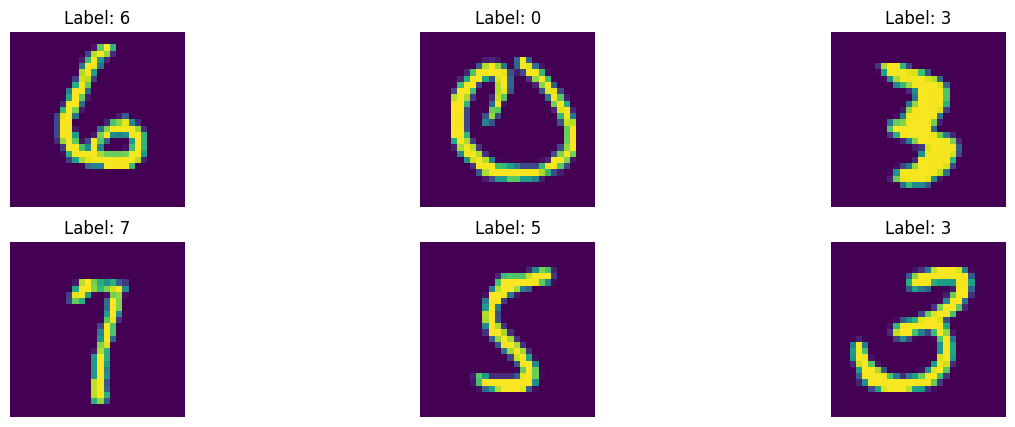

In [ ]:
# display some train examples with their labels
num_train_examples = 6
num_columns = 3
num_rows = num_train_examples // num_columns
if num_train_examples % num_columns > 0:
    num_rows += 1

# Get a random sample of indices
indices = random.sample(range(len(x_train)), num_train_examples)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))

for i, idx in enumerate(indices):
    row = i // num_columns
    col = i % num_columns
    img, label = x_train[idx], y_train[idx]
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Label: {label}')

# Remove empty plots
for j in range(num_train_examples, num_rows*num_columns):
    fig.delaxes(axes.flatten()[j])

# Show the plot
plt.show()


In [ ]:
# normalizing the dataset by dividing each example with maximum pixel value which is 255
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
# Define the model
model=keras.models.Sequential([
    
  # Add convolutions and max pooling
  keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Conv2D(16, (5,5), activation='relu'),
  keras.layers.MaxPooling2D(2,2),

  # Add dense layers
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
    
])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 512)               1

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history=model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 4ms/step - loss: 0.1646 - accuracy: 0.9505
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0586 - accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0420 - accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0236 - accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

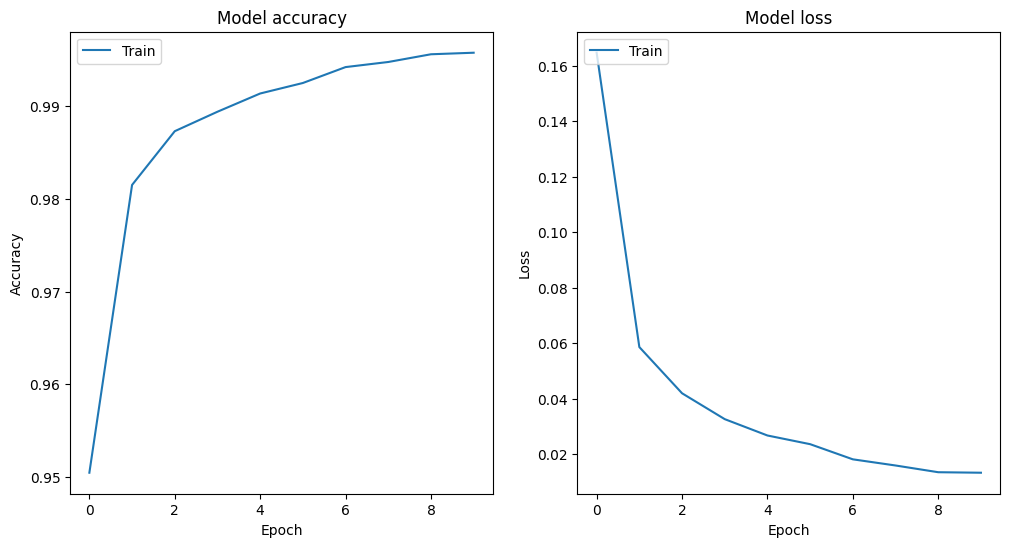

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Save the figure to the working directory
plt.savefig('training_plot.png')

plt.show()


In [12]:
# evaluate the model in the model
test_loss = model.evaluate(x_test, y_test)
print(test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9885
[0.04658689722418785, 0.9884999990463257]


1/1 [==============================] - 0s 20ms/step


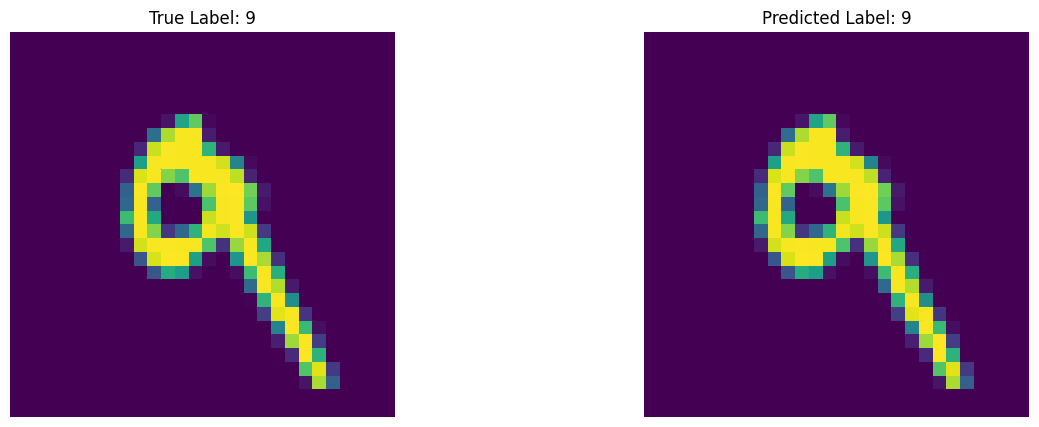

In [31]:
# make prediction 
idx_test_example=7
img=np.expand_dims(x_test[idx_test_example], axis=0)
y_pred=model.predict(img)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(img[0])
axes[0].axis('off')
axes[0].set_title(f'True Label: {y_test[idx_test_example]}')
axes[1].imshow(img[0])
axes[1].axis('off')
axes[1].set_title(f'Predicted Label: {np.argmax(y_pred)}')
plt.show()

In [ ]:
# save the model
model.save('model.h5')